<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/EXP02_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification

# Preparation

## EDA

### Look into the dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir() lists the names of the variable and methods 

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
iris.keys()
# check the data inside iris

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data = iris.data

print(iris_data.shape) 
# use shape to check the data's shape

(150, 4)


In [5]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

Check the targeet information

In [6]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

### Preparation
Using Pandas library, since iris data is 2d dataset

In [11]:
import pandas as pd

print(pd.__version__)

1.1.5


In [12]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Add a column `label` to store the answer 

In [13]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Prepare train dataset and test dataset
Create model with sklearn's train_test_split
- The first parameter `iris_data` is the feature.
- The second parameter `iris_label` is the answer label for the model which represents the iris species: [0, 1, 2].
- The third parameter `test_size` can manage the size of the test dataset. 0.2 means we are using 20% of the original dataset as a test dataset.
- The last parameter `random_state` manages the randomness to separate the train and test dataset.   
***By using `random_state` or `random_seed` we can reproduce the same test and train.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [15]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [16]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [17]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

# Create ML Model
reading materials about decision tree: https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [20]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

## Predict and Evaluate the DT Model

In [21]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [22]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

Check the accuracy

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

## Try another model

Do it all at once!

In [24]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### Introducing Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Introducing SVM (Support Vector Machine)
Reference: https://excelsior-cjh.tistory.com/66?category=918734   
   
   
- consider decision boundary and the margin
- less computation: only compute the support vector
- what if data is not lineary separable?
  - make it linearly separable in higher dimenstion, by mapping lower dimenstion to high dimension $y = x^2$
- use kernel trick
- SVM Parameter:
  - Cost: distance to the margin - decision boundary. If the cost gets larger, the boundary gets more complicated(pricse)
  - Gamma: per 1 train data, the gamma affects the region. If the gamma gets larger, it affects samller region.

In [26]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [27]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



### Inroducing Stochastic Gradient Descent Classifier (SGDClassifier)

Referecne: https://scikit-learn.org/stable/modules/sgd.html


In [29]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [30]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00        12
           2       0.54      1.00      0.70         7

    accuracy                           0.60        30
   macro avg       0.40      0.67      0.50        30
weighted avg       0.36      0.60      0.45        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Introducing Logistic Regression

Reference: http://hleecaster.com/ml-logistic-regression-concept/


In [31]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [32]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## Pitfall in the Accuracy

Use MNIST dataset to check what kinds of pitfalls are there when we measure the accuracy of a model.

In [33]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [34]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [35]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Use `matplotlib` to see the image

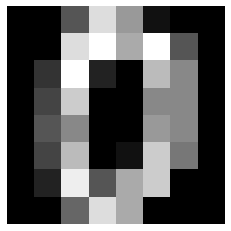

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

Let's check multiple images all at once

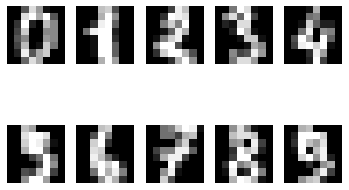

In [38]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

check target

In [37]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

But to check the accuracy, lets modify the model to evaluate if the model can distinguish the number 3 if given the handwritten image of 3.   
To do that, we need to modify `digits_label` in `target` a little.

In [39]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

Train decision tree agian!

In [40]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

However.. here we can see that our dataset has lots of 0s then 3s, which means that there are 90% or 0s, and if the input is always 0s, it has 90% of accuracy.

So, for the classification problem we use many other ***classificaton model evaluation metrics*** other then just accuracy. Let's see what they are..

## Confusion Matrix

Reference: https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html 

Four outputs in confusion matrix:
1. True Positive (TP) is the number of correct predictions that an example is positive which means positive class correctly identified as positive.
Example: Given class is spam and the classifier has been correctly predicted it as spam. (실제 환자에게 양성판정 (참 양성))

2. False Negative (FN) is the number of incorrect predictions that an example is negative which means positive class incorrectly identified as negative.
Example: Given class is spam however, the classifier has been incorrectly predicted it as non-spam.  (실제 환자에게 음성판정 (거짓 음성))

3. False positive (FP) is the number of incorrect predictions that an example is positive which means negative class incorrectly identified as positive.
Example: Given class is non-spam however, the classifier has been incorrectly predicted it as spam. (건강한 사람에게 양성판정 (거짓 양성))

4. True Negative (TN) is the number of correct predictions that an example is negative which means negative class correctly identified as negative.
Example: Given class is spam and the classifier has been correctly predicted it as negative. (건강한 사람에게 양성판정 (거짓 양성))

### Advanced Classification metrics based on confusion matrix

- Precision
- Negative Predictive Value
- Sensitivity (Recall)
- Specificity
- Accuracy
- F1 score: weighted average of the recall (sensitivity) and prevision. F1 score might be a good choice when you seek to balance btn Precision and Recall.   
$ F1 score = 2 * (Precision*Recall)/(Precision+Recall)$

In [43]:
# MNIST dataset
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred) # TP, FT, FP, TN

array([[320,  13],
       [  9,  18]])

In [ ]:
# check fake_pred that predicts all numbers to 0
confusion_matrix(y_test, [0,0,0,0])

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [ ]:
print(classification_report(y_test, fake_pred))

In [ ]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

Summary: Be careful when you deal with non-uniformly distributed data! We cannot evaluate model's performance only with `accuracy`